# Composing neurons

In the learner.py file, the classes for neurons and layers are constructed by composing scalar multiplications, bias, copy and sum, following arxiv:1711.10455. Here we show how this composition works and how to take gradients of neurons and layers using Jax.

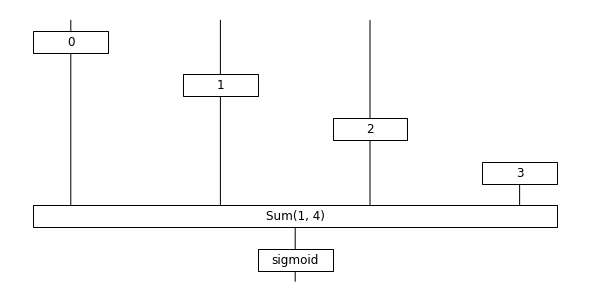

In [3]:
from discopy.learner import Neuron
import jax.numpy as np

dom = 3
weights = np.arange(dom + 1)
Neuron(dom, weights).draw(draw_types=False, aspect='auto', figsize=(8, 4))

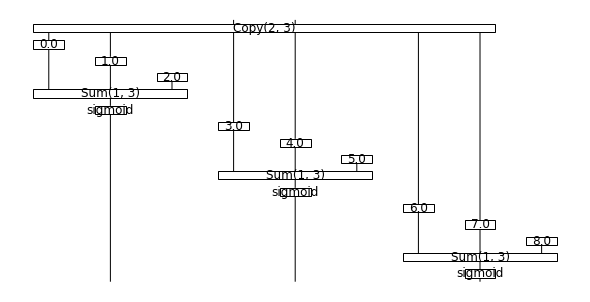

In [8]:
from discopy.learner import Layer

dom, cod = 2, 3
params = np.arange((dom + 1) * cod).reshape(dom + 1, cod).astype(float)
Layer(dom, cod, params).draw(draw_types=False, aspect='auto', figsize=(8, 4))

We can jit and take the gradient of neurons using Jax.

In [3]:
from jax import jit, grad
from time import time
from random import uniform

dom = 3
weights = [uniform(-2, 2) for i in range(dom + 1)]
input_vector = np.array([uniform(-1, 1) for i in range(dom)])
neuron = Neuron(dom, weights)

start = time()
jit(neuron)
print("{1:.3f} seconds to compile a neuron just in time:\n{0}".format(neuron(input_vector), time() - start))

print("\nGradient at [0., 0., 0.]: {}".format(grad(lambda x: neuron(x)[0])(np.array([0.2, 0.3, 0.4]))))

0.243 seconds to compile a neuron just in time:
[0.794839]

Gradient at [0, 0, 0, 0]: [-0.27718723  0.08234481 -0.10376777]


In [4]:
dom, cod = 4, 3
params = [[uniform(-2, 2) for i in range(dom + 1)] for j in range(cod)]
layer = Layer(dom, cod, params)
input_vector = np.array([uniform(-1, 1) for i in range(dom)])

start = time()
jit(layer)
print("{1:.3f} seconds to compile layer just in time:\n{0}".format(layer(input_vector), time() - start))

print("\nGradient at [0., 0., 0., 0.]: {}".format(grad(lambda x: layer(x)[0])(np.array([0., 0., 0., 0.]))))

0.663 seconds to compile layer just in time:
[0.9023688  0.12513153 0.12779681]

Gradient at [0, 0, 0, 0]: [-0.26577592  0.06809294 -0.28774536  0.24472626]


In [5]:
dom, cod = 3, 1
zeros = [[0. for i in range(dom + 1)] for j in range(cod)]
disconnected_layer = Layer(dom, cod, zeros)
assert np.all(grad(lambda x: disconnected_layer(x)[0])(np.array([2., 3.4, 1.])) == np.array([0., 0., 0.]))